In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn import tree
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CleanedEV.csv") 

In [3]:
dataX = df.drop(columns=['HFUEL'])
dataY = df[['HFUEL']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2)

# Naive bays Model

In [5]:
gnb = GaussianNB(priors=None, var_smoothing=1.0)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
print(nbModel_grid.score(X_test, y_test))

y_pred = nbModel_grid.predict(X_test) 
print(classification_report(y_test,y_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.0)
0.9759036144578314
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1215
           1       0.00      0.00      0.00        30

    accuracy                           0.98      1245
   macro avg       0.49      0.50      0.49      1245
weighted avg       0.95      0.98      0.96      1245



C:\Users\Chom\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: P

# Pumping the weight by Using SMOTE with Naive bays

In [6]:
dataX_over = df.drop(columns=['HFUEL'])
dataY_over = df[['HFUEL']]
Over_Sample = SMOTE()
dataX_over , dataY_over = Over_Sample.fit_resample(dataX_over,dataY_over)

In [7]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(dataX_over, dataY_over, test_size = 0.2)

In [8]:
gnb = GaussianNB(priors=None, var_smoothing=1.0)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_over, y_train_over)
print(nbModel_grid.best_estimator_)
print(nbModel_grid.score(X_test_over, y_test_over))

y_pred = nbModel_grid.predict(X_test_over) 
print(classification_report(y_test_over,y_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB()
0.5700164744645799
              precision    recall  f1-score   support

           0       0.70      0.22      0.33      1192
           1       0.55      0.91      0.68      1236

    accuracy                           0.57      2428
   macro avg       0.62      0.56      0.51      2428
weighted avg       0.62      0.57      0.51      2428



C:\Users\Chom\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Logistic regression model

In [23]:
model_logis1 = LogisticRegression()
classifier = model_logis1.fit(X_train,y_train)



C:\Users\Chom\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
ypred_test = model_logis1.predict(X_test)
acc=format(accuracy_score(y_test,ypred_test), "0.2%")
print("Accuracy : ",acc)

Accuracy :  97.59%


C:\Users\Chom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[1215    0]
 [  30    0]]


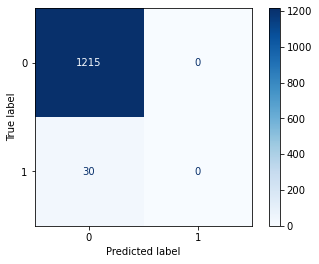

In [25]:
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["0", "1"],cmap=plt.cm.Blues)
print(disp.confusion_matrix)

In [31]:
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1222
           1       0.00      0.00      0.00        23

    accuracy                           0.98      1245
   macro avg       0.49      0.50      0.50      1245
weighted avg       0.96      0.98      0.97      1245



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# Pumping the weight by Using SMOTE with Logistic regression

In [12]:
X_oversampling = df.drop(columns=['HFUEL']) #SMOTE
y_oversampling = df[['HFUEL']]
Oversampling = SMOTE()
X_oversampling , y_oversampling = Oversampling.fit_resample(X_oversampling,y_oversampling)

In [14]:
X_trainO, X_testO, y_trainO, y_testO = train_test_split(X_oversampling, y_oversampling, test_size = 0.2)

In [15]:
model_logis2 = LogisticRegression()
classifier = model_logis2.fit(X_trainO,y_trainO)

C:\Users\Chom\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
ypred_test = model_logis2.predict(X_testO)
acc=format(accuracy_score(y_testO,ypred_test), "0.2%")
print("Accuracy : ",acc)

Accuracy :  50.99%


C:\Users\Chom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[961 254]
 [936 277]]


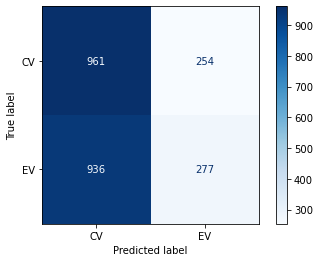

In [17]:
disp = plot_confusion_matrix(classifier, X_testO, y_testO, display_labels=["CV", "EV"],cmap=plt.cm.Blues)
print(disp.confusion_matrix)

In [18]:
print(classification_report(y_testO,ypred_test))

              precision    recall  f1-score   support

           0       0.51      0.79      0.62      1215
           1       0.52      0.23      0.32      1213

    accuracy                           0.51      2428
   macro avg       0.51      0.51      0.47      2428
weighted avg       0.51      0.51      0.47      2428



# Decision tree model

In [26]:
modelClf = DecisionTreeClassifier().fit(dataX, dataY)
for i,j in enumerate(dataX):
  score_f = modelClf.feature_importances_
  print(j, '= ', score_f[i])

Unnamed: 0 =  0.27746023107701545
HHFAMINC =  0.021462269694186742
HOMEOWN =  0.012909405248167374
HHSIZE =  0.032999022197433746
YOUNGCHILD =  0.00935161183286536
HHVEHCNT =  0.040095402323629334
URBRUR =  0.016731441180143823
HTPPOPDN =  0.033952562615113105
PRICE =  0.06262586985272013
PLACE =  0.04172111273507883
R_AGE_IMP =  0.12034945118493116
R_SEX_IMP =  0.004238909185965409
EDUC =  0.040234624038133465
R_RACE =  0.023170722030614443
GT1JBLWK =  0.017515667811820835
OCCAT =  0.03279294928829981
CARSHARE =  0.0005599053389291059
TIMETOWK =  0.0648629483654674
YEARMILE =  0.0973860756654605
VEHAGE =  0.049579818334024174


In [27]:
res_pred = modelClf.predict(X_test)
score = accuracy_score(y_test, res_pred)
score
print(classification_report(y_test, res_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1215
           1       1.00      1.00      1.00        30

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245



In [28]:
confusion_matrix(res_pred , y_test)

array([[1215,    0],
       [   0,   30]], dtype=int64)